In [249]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import pickle
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings("ignore")
from prettytable import PrettyTable

In [173]:
def get(soup):
  name=[]
  prices=[]
  ratings=[]
  products_on_page=soup.find_all('a',href=True,attrs={'class':"_1fQZEK"})
  for p in products_on_page:
    na=p.find('div',attrs={'class':"_4rR01T"})
    pr=p.find('div',attrs={'class':"_30jeq3 _1_WHN1"})
    ra=p.find('div',attrs={'class':"_3LWZlK"})    
    #------------------------------------------------
    if type(na)==type(None):
      name.append(None)
    else:
      name.append(na.text)
    #-------------------------------------------------
    if type(pr)==type(None):
      prices.append(None)
    else:
      prices.append(int(re.sub(r"\W+|_", "",pr.text)))
    #--------------------------------------------------
    if type(ra)==type(None):
      ratings.append(None)
    else:
      ratings.append(float(ra.text))
  
  return name,prices,ratings

In [174]:
url='https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page='

In [175]:
name=[]
prices=[]
ratings=[]
for i in range(1,40):
  h = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.88 Safari/537.36"}
  req=requests.get(url+str(i),headers=h)
  soup=BeautifulSoup(req.content,"html.parser")
  A,B,C=get(soup)
  name=name+A
  prices=prices+B
  ratings=ratings+C

In [176]:
df=pd.DataFrame(data={'Name':name,'Prices':prices,'Ratings':ratings})

In [177]:
df.sample(5)

,Name,Prices,Ratings
191,ASUS VivoBook Ultra 14 Core i3 10th Gen - (4 G...,41490.0,4.4
499,ASUS VivoBook Ultra 14 Core i3 10th Gen - (4 G...,40990.0,4.4
901,HP Pavilion Gaming Ryzen 5 Hexa Core 5600H - (...,71343.0,3.9
736,ASUS VivoBook Ultra 17 Ryzen 5 Hexa Core - (8 ...,62790.0,4.2
780,DELL Inspiron Core i5 11th Gen - (4 GB/1 TB HD...,58990.0,4.3


In [178]:
df.shape

(912, 3)

# Deduplication of data

In [179]:
#Duplicate Rows
print(df.duplicated().sum())
print("Around {} % of rows are duplicate".format(round((df.duplicated().sum()/df.shape[0])*100)))
df.drop_duplicates(inplace=True)

232
Around 25 % of rows are duplicate


In [180]:
#Null Values
df.isnull().sum()
print("-"*20)
print("Around {} % of rows have ratings are Null".format(round((df["Ratings"].isnull().sum()/df.shape[0])*100)))
print()
df["Ratings"]=df.Ratings.fillna(df.Ratings.median())

--------------------
Around 32 % of rows have ratings are Null



In [181]:
# Droping row where price is Null
df.dropna(inplace=True)

# Adding some extra features/columns

In [182]:
# adding 'Brand' column

brand=[i.split(" ")[0].lower() for i in df.Name.values]
#print(brand)
df["Brand"]=brand

In [183]:
# adding processor feature
def get_processor(string):

  val=re.search(r"i\d",string)
  if val !=None:
    return val.group()
  else:
    return "other_processor"
#-------------------------------------------
df["processor"]=df.Name.apply(get_processor)

In [189]:
re.search(r"\d\sGB",df.Name.values[0]).group()

'8 GB'

In [191]:
# adding Ram feature
def get_ram(string):
  lst=re.search(r"\d\sGB",string)
  if lst == None:
    return None
  else:
    return lst.group()
ram=df.Name.apply(get_ram)
df["ram"]=ram

#EDA

In [214]:
df.describe()

,Prices,Ratings
count,679.000000,679.000000
mean,75413.929308,4.278203
std,43928.693884,0.320254
min,13990.000000,1.700000
25%,44490.000000,4.200000
50%,62990.000000,4.300000
75%,89994.000000,4.400000
max,345390.000000,5.000000


In [215]:
#correlation
df.corr()

,Prices,Ratings
Prices,1.000000,0.145588
Ratings,0.145588,1.000000


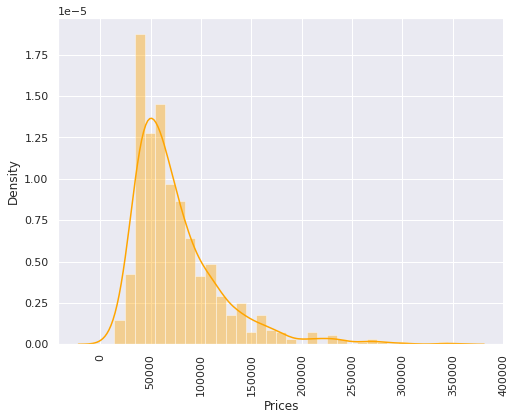

In [232]:
#Price
plt.figure(figsize=(8,6))
sn.distplot(df.Prices,color='orange')
plt.xticks(rotation="vertical")
plt.show()

In [250]:
#table
table=PrettyTable(["Percentiles, Prices"])

In [253]:
#Percentiles of prices
print("Price Percentile :")
print()
for i in range(0,100,10):
  per=np.percentile(df.Prices.values,i)
  print("{}th percentile = ₹ {} ".format(i,round(per)))
for i in range(91,99,1):
  per=np.percentile(df.Prices.values,i)
  print("{}th percentile = ₹ {} ".format(i,round(per)))
for i in np.arange(0.0,1.0,0.1):
  per=np.percentile(df.Prices.values,99+i)
  print("{}th percentile = ₹ {} ".format(99+i,round(per)))
per=np.percentile(df.Prices.values,100)
print("{}th percentile = ₹ {} ".format(100,round(per)))

Price Percentile :

0th percentile = ₹ 13990 
10th percentile = ₹ 37101 
20th percentile = ₹ 41990 
30th percentile = ₹ 47990 
40th percentile = ₹ 56418 
50th percentile = ₹ 62990 
60th percentile = ₹ 70997 
70th percentile = ₹ 82996 
80th percentile = ₹ 101396 
90th percentile = ₹ 130982 
91th percentile = ₹ 134990 
92th percentile = ₹ 139990 
93th percentile = ₹ 143605 
94th percentile = ₹ 154990 
95th percentile = ₹ 160221 
96th percentile = ₹ 169750 
97th percentile = ₹ 179990 
98th percentile = ₹ 210598 
99.0th percentile = ₹ 236090 
99.1th percentile = ₹ 239480 
99.2th percentile = ₹ 251510 
99.3th percentile = ₹ 262352 
99.4th percentile = ₹ 268658 
99.5th percentile = ₹ 269717 
99.6th percentile = ₹ 272870 
99.7th percentile = ₹ 279650 
99.8th percentile = ₹ 292870 
99.9th percentile = ₹ 314609 
100th percentile = ₹ 345390 


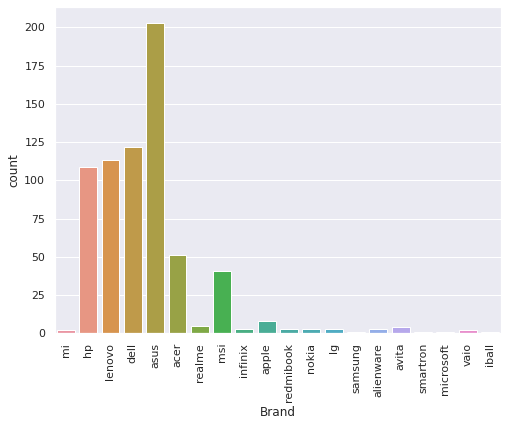

In [239]:
#brand column
plt.figure(figsize=(8,6))
sn.set_theme(style="darkgrid")
ax = sn.countplot(x="Brand", data=df)
plt.xticks(rotation="vertical")
plt.show()

Asus, Lenovo, hp, dell, acer. The laptops of these brands are being purchased in more numbers than that of laptops of other brands

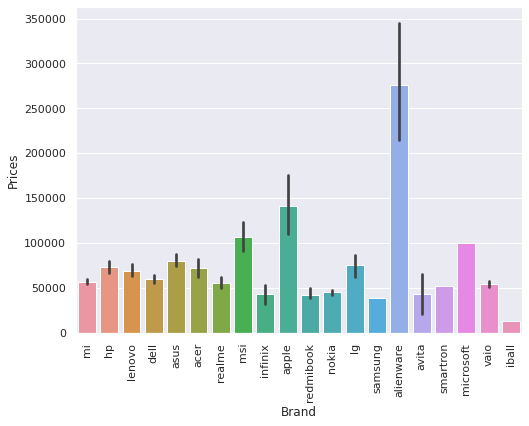

In [238]:
plt.figure(figsize=(8,6))
sn.barplot(df.Brand,df.Prices)
plt.xticks(rotation='vertical')
plt.show()

laptops of Microsoft, Alienwaew, MSI, Apple are costly in comparison to other brands

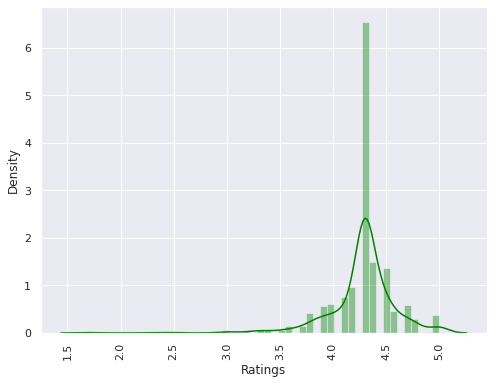

In [233]:
# Ratings
plt.figure(figsize=(8,6))
sn.distplot(df.Ratings,color='green')
plt.xticks(rotation="vertical")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


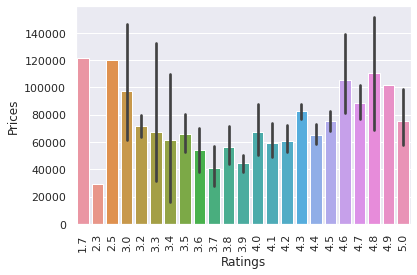

In [205]:
# Ratings and Price relation
sn.barplot(df.Ratings,df.Prices)
plt.xticks(rotation='vertical')
plt.show()

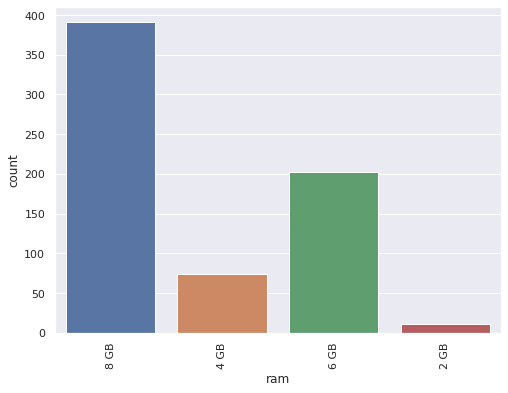

In [234]:
#Ram
plt.figure(figsize=(8,6))
sn.set_theme(style="darkgrid")
ax = sn.countplot(x="ram", data=df)
plt.xticks(rotation="vertical")
plt.show()

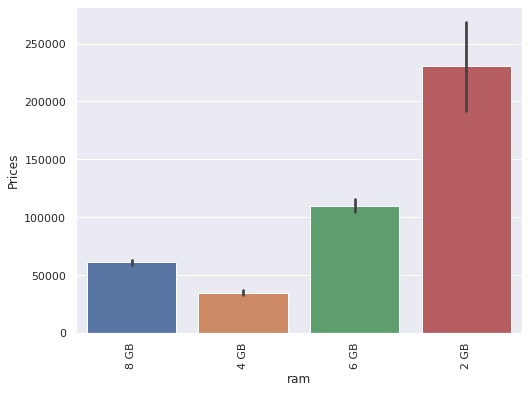

In [235]:
#Price and Ram relationship
plt.figure(figsize=(8,6))
sn.barplot(df.ram,df.Prices)
plt.xticks(rotation='vertical')
plt.show()

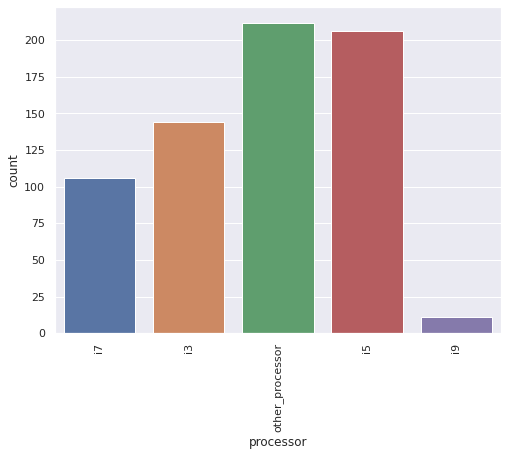

In [236]:
#processor
plt.figure(figsize=(8,6))
sn.set_theme(style="darkgrid")
ax = sn.countplot(x="processor", data=df)
plt.xticks(rotation="vertical")
plt.show()

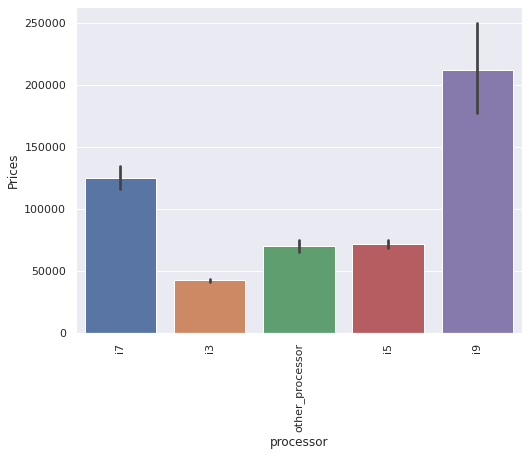

In [237]:
#Price and Ram relationship
plt.figure(figsize=(8,6))
sn.barplot(df.processor,df.Prices)
plt.xticks(rotation='vertical')
plt.show()